# Cab Booking


### Load the needed Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [159]:
#Reading the csv files (train and test datasets)
train=pd.read_csv("train.csv")
train_label = pd.read_csv("train_label.csv", header=None)
test = pd.read_csv("test.csv")
test_label = pd.read_csv("test_label.csv", header=None)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
datetime      8708 non-null object
season        8708 non-null object
holiday       8708 non-null int64
workingday    8708 non-null int64
weather       8708 non-null object
temp          8708 non-null float64
atemp         8708 non-null float64
humidity      8708 non-null int64
windspeed     8708 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 612.4+ KB


In [161]:
# Convert argument to datetime
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [162]:
# For train dataset
# Extracting the needed information from the datetime column 
# Extracting the Year, Month, Day and Hour
train['Year'] = pd.DatetimeIndex(train['datetime']).year
train['Month'] = pd.DatetimeIndex(train['datetime']).month
train['Day'] = pd.DatetimeIndex(train['datetime']).day
train['Hour'] = pd.DatetimeIndex(train['datetime']).hour
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012,5,2,19
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012,9,5,4
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011,1,13,9
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011,11,18,16
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011,9,13,13


In [163]:
# For test dataset
# Extracting the needed information from the datetime column 
# Extracting the Year, Month, Day and Hour
test['Year'] = pd.DatetimeIndex(test['datetime']).year
test['Month'] = pd.DatetimeIndex(test['datetime']).month
test['Day'] = pd.DatetimeIndex(test['datetime']).day
test['Hour'] = pd.DatetimeIndex(test['datetime']).hour
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,2012,5,10,11
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,2012,6,9,7
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,2011,3,6,20
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,2011,10,13,11
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,2012,6,2,12


In [164]:
# Added the target column to the main dataset by creating a column name as 'Bookings'
train['Bookings']=train_label

test['Bookings']=test_label

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Bookings
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,2012,5,2,19,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,2012,9,5,4,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,2011,1,13,9,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,2011,11,18,16,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,2011,9,13,13,184


In [165]:
# To check the different values in that particular column
train['season'].unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [166]:
train['season'].value_counts()

Summer    2197
Fall      2189
Winter    2186
Spring    2136
Name: season, dtype: int64

In [167]:
# To check the different values in that particular column
train['weather'].unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

In [168]:
train['weather'].value_counts()

 Clear + Few clouds            5753
 Mist + Cloudy                 2276
 Light Snow, Light Rain         678
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

In [169]:
#For converting categorical data into numerical number in the train dataset
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
train['season']= labelencoder.fit_transform(train['season']) #fitting and transforming the desired categorical column.
train['weather']= labelencoder.fit_transform(train['weather'])

#For converting categorical data into numerical number in the test dataset
test['season']= labelencoder.fit_transform(test['season']) #fitting and transforming the desired categorical column.
test['weather']= labelencoder.fit_transform(test['weather'])

In [170]:
# Dropping the datetime column since already we extracted the data from that column (from train dataset)
train=train.drop('datetime',axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Bookings
0,2,0,1,0,22.14,25.760,77,16.9979,2012,5,2,19,504
1,0,0,1,0,28.70,33.335,79,19.0012,2012,9,5,4,5
2,1,0,1,0,5.74,6.060,50,22.0028,2011,1,13,9,139
3,3,0,1,0,13.94,16.665,29,8.9981,2011,11,18,16,209
4,0,0,1,0,30.34,33.335,51,19.0012,2011,9,13,13,184


In [171]:
# Dropping the datetime column since already we extracted the data from that column (from test dataset)
test=test.drop('datetime',axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Bookings
0,2,0,1,0,21.32,25.000,48,35.0008,2012,5,10,11,256
1,2,0,0,0,23.78,27.275,64,7.0015,2012,6,9,7,87
2,1,0,0,1,11.48,12.120,100,27.9993,2011,3,6,20,11
3,3,0,1,2,25.42,28.790,83,0.0000,2011,10,13,11,84
4,2,0,0,0,25.42,31.060,43,23.9994,2012,6,2,12,668


In [172]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Year', 'Month', 'Day', 'Hour', 'Bookings'],
      dtype='object')

In [173]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Year', 'Month', 'Day', 'Hour', 'Bookings'],
      dtype='object')

# File Structure

In [174]:
print("We have {0} rows and {1} columns in train data".format(train.shape[0],train.shape[1]))
print("We have {0} rows and {1} columns in test data".format(test.shape[0],test.shape[1]))

We have 8708 rows and 13 columns in train data
We have 2178 rows and 13 columns in test data


In [175]:
train['Bookings'].describe()

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Bookings, dtype: float64

# Univariate Analysis

### Single variable Data Visualization

Text(0, 0.5, 'Frequency')

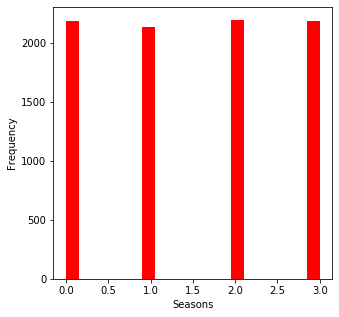

In [176]:
#plotting season graph
train['season'].plot.hist(subplots=True, figsize=(5, 5), bins=20,color='r')
plt.xlabel("Seasons")
plt.ylabel("Frequency")
#from this graph we can understand that in all the seasons bookings are happening
#{0:'Summer', 1:'Fall', 2:'Spring', 3:'Winter'}

In [177]:
train['weather'].unique()

array([0, 2, 3, 1], dtype=int64)

Text(0, 0.5, 'Frequency')

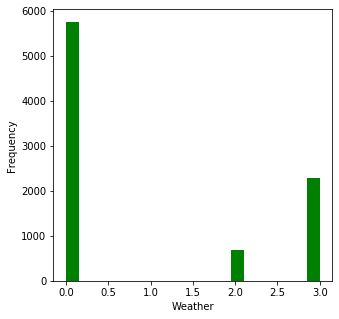

In [178]:
train['weather'].plot.hist(subplots=True, figsize=(5, 5), bins=20,color='g')
plt.xlabel("Weather")
plt.ylabel("Frequency")
# {0:'Clear + Few clouds', 2:' Mist + Cloudy ',3:' Light Snow, Light Rain', 1:' Heavy Rain + Thunderstorm ']
#from this graph we can understand that if the waether condition is 'Heavy Rain + Thunderstorm' then bookings are not happening

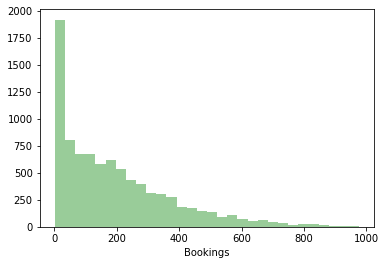

In [179]:
#Distplot flexibly plots a univariate distribution of observations.
sns.distplot(train['Bookings'], kde=False, bins=30,color='g')

### Data Visualization of Seasons and Weather

Text(0, 0.5, 'Frequency')

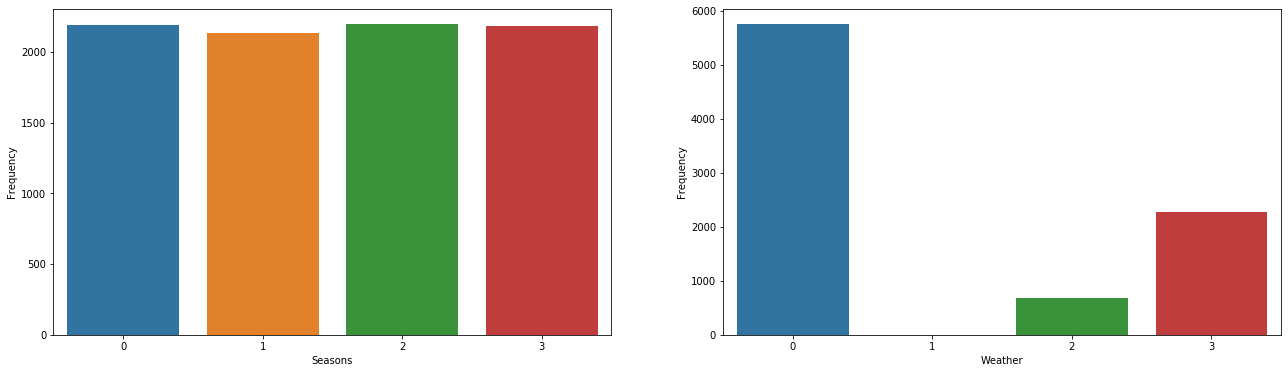

In [180]:
plt.figure(figsize=(22,6))

#Seasons
plt.subplot(121)
sns.countplot(train['season'])
plt.xlabel("Seasons")
plt.ylabel("Frequency")

#Weather
plt.subplot(122)
sns.countplot(train['weather'])
plt.xlabel("Weather")
plt.ylabel("Frequency")

### Data Visualization of Weekday and Hour

Text(0, 0.5, 'Frequency')

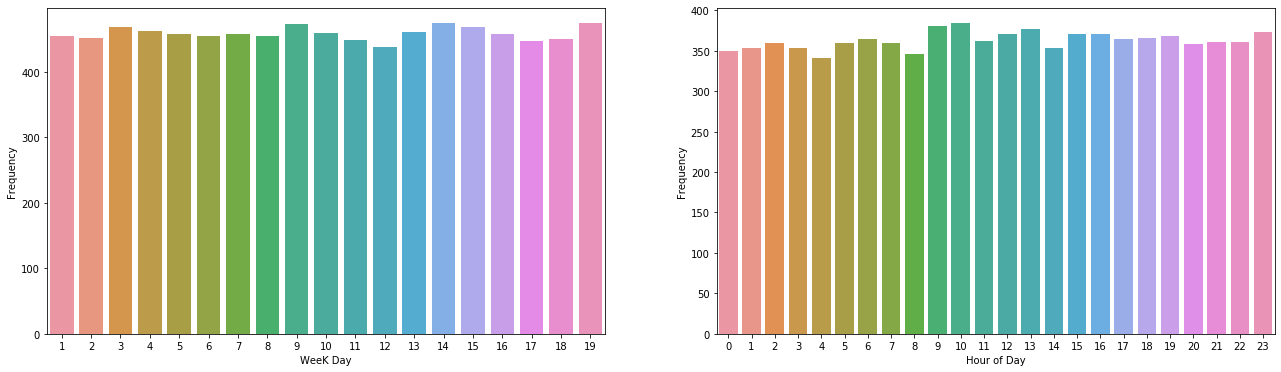

In [181]:
#Daretime Features
plt.figure(figsize=(22,6))

# Weekday
plt.subplot(121)
sns.countplot(train['Day'])
plt.xlabel("WeeK Day")
plt.ylabel("Frequency")

# Hour
plt.subplot(122)
sns.countplot(train['Hour'])
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")

### Data Visualization of Year and Month

Text(0, 0.5, 'Frequency')

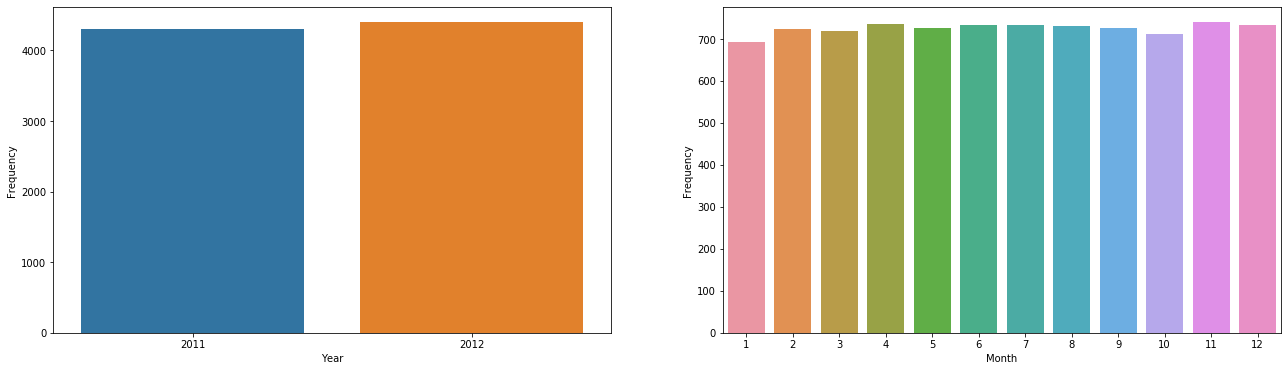

In [182]:
#Daretime Features
plt.figure(figsize=(22,6))

# Year
plt.subplot(121)
sns.countplot(train['Year'])
plt.xlabel("Year")
plt.ylabel("Frequency")

# Month
plt.subplot(122)
sns.countplot(train['Month'])
plt.xlabel("Month")
plt.ylabel("Frequency")

### Bivariate Analysis 
### Features with Target

In [183]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Year', 'Month', 'Day', 'Hour', 'Bookings'],
      dtype='object')

### Total Booking vs Weekday

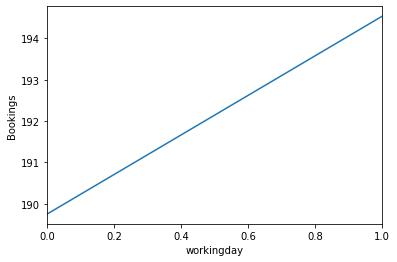

In [184]:
avg_weekday_booking = pd.DataFrame(train.groupby(['workingday'])['Bookings'].mean()).reset_index()
avg_weekday_booking['unit'] = 1

sns.tsplot(data=avg_weekday_booking, time='workingday', unit='unit', value='Bookings')

#### Total Booking vs Hour of Day

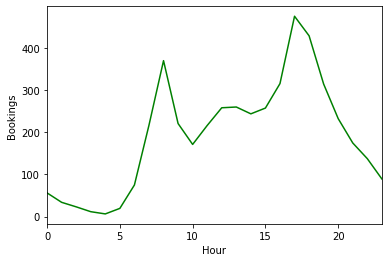

In [185]:
avg_hour_booking = pd.DataFrame(train.groupby(['Hour'])['Bookings'].mean()).reset_index()
avg_hour_booking['unit'] = 1

sns.tsplot(data=avg_hour_booking, time='Hour', unit='unit', value='Bookings',color='g')

### Total Booking vs Temp

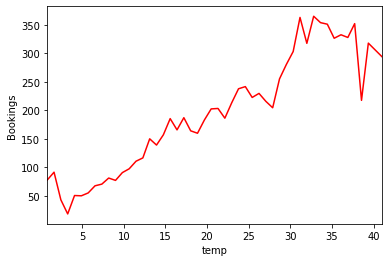

In [186]:
avg_temp_booking = pd.DataFrame(train.groupby('temp')['Bookings'].mean()).reset_index()
avg_temp_booking['unit'] = 1

sns.tsplot(data=avg_temp_booking, time='temp', unit='unit', value='Bookings',color='r')

### Total Booking vs Humidity

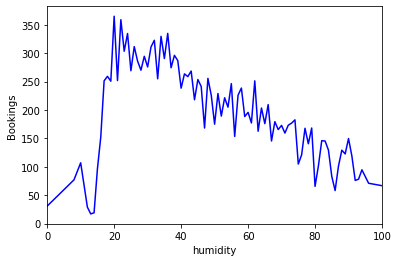

In [187]:
avg_hum_booking = pd.DataFrame(train.groupby('humidity')['Bookings'].mean())
avg_hum_booking.reset_index(inplace=True)
avg_hum_booking['unit'] = 1

sns.tsplot(data=avg_hum_booking, time='humidity', unit='unit', value='Bookings',color='b')

### Total Booking vs Windspeed

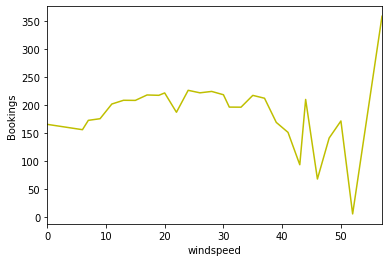

In [188]:
avg_ws_booking = pd.DataFrame(train.groupby('windspeed')['Bookings'].mean()).reset_index()
avg_ws_booking['unit'] = 1

sns.tsplot(data=avg_ws_booking, time='windspeed', unit='unit', value='Bookings',color='y')

### Outlier Analysis
Boxplot is very simple and effective way to visualize outliers

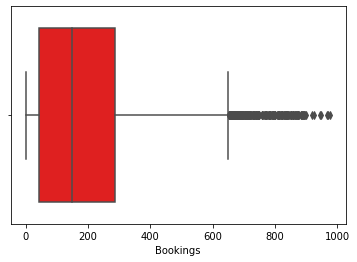

In [189]:
# The lower and upper whiskers as the boundaries of the data distribution. 
#Any data points that show above or below the whiskers, can be considered outliers or anomalous.

sns.boxplot(train['Bookings'],color='r')

In [190]:
train.loc[train['Bookings']>650, 'Bookings']=np.mean(train['Bookings'])
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Bookings
0,2,0,1,0,22.14,25.760,77,16.9979,2012,5,2,19,504.0
1,0,0,1,0,28.70,33.335,79,19.0012,2012,9,5,4,5.0
2,1,0,1,0,5.74,6.060,50,22.0028,2011,1,13,9,139.0
3,3,0,1,0,13.94,16.665,29,8.9981,2011,11,18,16,209.0
4,0,0,1,0,30.34,33.335,51,19.0012,2011,9,13,13,184.0


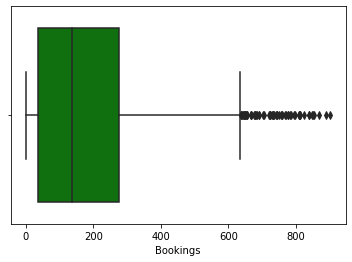

In [191]:
sns.boxplot(test['Bookings'],color='g')

In [192]:
test.loc[test['Bookings']>650, 'Bookings']=np.mean(test['Bookings'])
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Bookings
0,2,0,1,0,21.32,25.000,48,35.0008,2012,5,10,11,256.000000
1,2,0,0,0,23.78,27.275,64,7.0015,2012,6,9,7,87.000000
2,1,0,0,1,11.48,12.120,100,27.9993,2011,3,6,20,11.000000
3,3,0,1,2,25.42,28.790,83,0.0000,2011,10,13,11,84.000000
4,2,0,0,0,25.42,31.060,43,23.9994,2012,6,2,12,185.845271


### Feature Engineering

In [193]:
# Removing the junk data
# For example if the working day is equal to one means, it is understood that holiday should be equal to zero
# If that is not the case then will remove respective rows

train=train[((train['holiday']==1)&(train['workingday']==0))|((train['holiday']==0)&(train['workingday']==1))]

test=test[((test['holiday']==1)&(test['workingday']==0))|((test['holiday']==0)&(test['workingday']==1))]

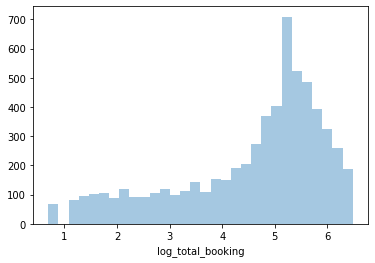

In [194]:
train['log_total_booking'] = np.log(train['Bookings'].values + 1)
sns.distplot(train['log_total_booking'], kde=False, bins=30)

### Scaling Operation using Standard scaler

In [195]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
df=st.fit_transform(train)
train=pd.DataFrame(df,columns=train.columns)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Bookings,log_total_booking
0,0.441294,-0.204606,0.204606,-0.714387,0.221243,0.231859,0.807636,0.496637,0.991289,-0.445404,-1.475759,1.077260,2.181611,1.190868
1,-1.342961,-0.204606,0.204606,-0.714387,1.059301,1.123802,0.911924,0.741193,0.991289,0.722161,-0.925293,-1.104933,-1.132642,-1.953530
2,-0.450834,-0.204606,0.204606,-0.714387,-1.873903,-2.087782,-0.600244,1.107618,-1.008788,-1.612969,0.542618,-0.377535,-0.242642,0.280834
3,1.333422,-0.204606,0.204606,-0.714387,-0.826330,-0.839062,-1.695262,-0.479950,-1.008788,1.305944,1.460062,0.640822,0.222283,0.568450
4,-1.342961,-0.204606,0.204606,-0.714387,1.268816,1.123802,-0.548100,0.741193,-1.008788,0.722161,0.542618,0.204383,0.056238,0.478539


In [196]:
df1=st.fit_transform(test)
test=pd.DataFrame(df1,columns=test.columns)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour,Bookings
0,0.452927,-0.205764,0.205764,-0.702614,0.134041,0.150451,-0.763986,2.735274,1.009718,-0.425806,0.024383,-0.055019,0.574218
1,1.346679,-0.205764,0.205764,1.586785,0.668482,0.605410,1.050389,-1.561270,-0.990375,1.019957,0.575141,-0.055019,-0.562430
2,0.452927,-0.205764,0.205764,-0.702614,-1.041729,-0.940730,-0.090075,-0.824344,-0.990375,-0.714958,-1.627889,1.643192,-0.767291
3,1.346679,-0.205764,0.205764,1.586785,-0.507288,-0.395139,-0.660308,-0.210787,1.009718,1.309110,-1.627889,0.935604,0.110606
4,1.346679,-0.205764,0.205764,-0.702614,-0.186624,-0.122644,-1.126862,1.384790,1.009718,1.019957,0.391555,0.652569,2.318841


### Correlation Heatmap

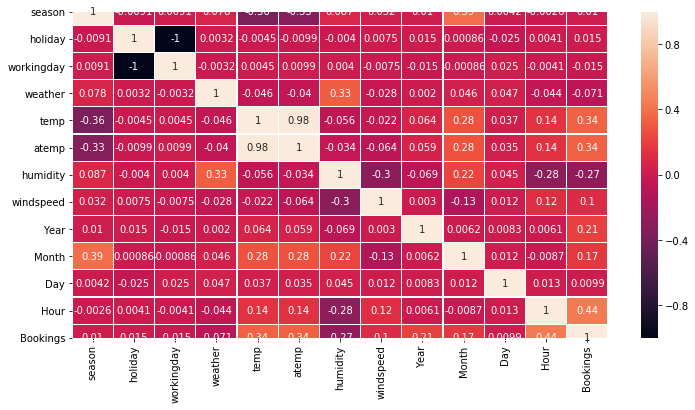

In [197]:
plt.figure(figsize=(12,6))

train = train.drop(columns=['log_total_booking'])
corr = train.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True, linewidths=.2)

### temp and atemp are highly correlated, so one of the column should be removed from Independent Variables for prediction

In [198]:
train=train.drop('atemp',axis=1)
test=test.drop('atemp',axis=1)

In [199]:
test.dtypes

season        float64
holiday       float64
workingday    float64
weather       float64
temp          float64
humidity      float64
windspeed     float64
Year          float64
Month         float64
Day           float64
Hour          float64
Bookings      float64
dtype: object

### Missing value analysis

In [200]:
train.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
Year          0
Month         0
Day           0
Hour          0
Bookings      0
dtype: int64

In [201]:
test.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
Year          0
Month         0
Day           0
Hour          0
Bookings      0
dtype: int64

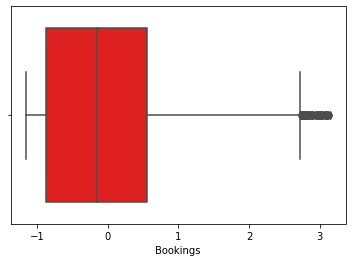

In [202]:
sns.boxplot(train['Bookings'],color='r')

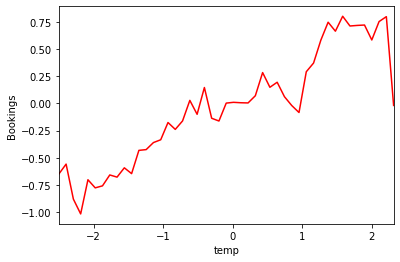

In [203]:
avg_temp_booking = pd.DataFrame(train.groupby('temp')['Bookings'].mean()).reset_index()
avg_temp_booking['unit'] = 1

sns.tsplot(data=avg_temp_booking, time='temp', unit='unit', value='Bookings',color='r')


### Model Building

In [204]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [205]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,Year,Month,Day,Hour,Bookings
0,0.441294,-0.204606,0.204606,-0.714387,0.221243,0.807636,0.496637,0.991289,-0.445404,-1.475759,1.077260,2.181611
1,-1.342961,-0.204606,0.204606,-0.714387,1.059301,0.911924,0.741193,0.991289,0.722161,-0.925293,-1.104933,-1.132642
2,-0.450834,-0.204606,0.204606,-0.714387,-1.873903,-0.600244,1.107618,-1.008788,-1.612969,0.542618,-0.377535,-0.242642
3,1.333422,-0.204606,0.204606,-0.714387,-0.826330,-1.695262,-0.479950,-1.008788,1.305944,1.460062,0.640822,0.222283
4,-1.342961,-0.204606,0.204606,-0.714387,1.268816,-0.548100,0.741193,-1.008788,0.722161,0.542618,0.204383,0.056238


In [206]:
xtrain=train.iloc[:,:-1]
ytrain=train.iloc[:,-1]

In [207]:
test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,Year,Month,Day,Hour,Bookings
0,0.452927,-0.205764,0.205764,-0.702614,0.134041,-0.763986,2.735274,1.009718,-0.425806,0.024383,-0.055019,0.574218
1,1.346679,-0.205764,0.205764,1.586785,0.668482,1.050389,-1.561270,-0.990375,1.019957,0.575141,-0.055019,-0.562430
2,0.452927,-0.205764,0.205764,-0.702614,-1.041729,-0.090075,-0.824344,-0.990375,-0.714958,-1.627889,1.643192,-0.767291
3,1.346679,-0.205764,0.205764,1.586785,-0.507288,-0.660308,-0.210787,1.009718,1.309110,-1.627889,0.935604,0.110606
4,1.346679,-0.205764,0.205764,-0.702614,-0.186624,-1.126862,1.384790,1.009718,1.019957,0.391555,0.652569,2.318841


In [208]:
xtest=test.iloc[:,:-1]
ytest=test.iloc[:,-1]

### Cross Validation

In [209]:
def cross_validation_score(ml_model,cols = xtrain.columns):
    i = 1
    cv_scores=[]
   
    kf = KFold(n_splits=5,random_state=42,shuffle=True)
    for train_index,test_index in kf.split(xtrain,ytrain):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        model = ml_model
        model.fit(xtrain, ytrain)
        pred_val = model.predict(xtest)
        
        rmse_score = sqrt(mean_squared_error(ytest, pred_val))
        msg = ""
        msg += "RMSE score: {}".format(rmse_score)
        print("{}".format(msg))
        
        
        # Save scores
        cv_scores.append(rmse_score)
        i+=1
    return cv_scores

### Linear Regression

In [210]:
linreg_scores = cross_validation_score(LinearRegression())



1 of kfold 5
RMSE score: 0.8172234219780212

2 of kfold 5
RMSE score: 0.8172234219780212

3 of kfold 5
RMSE score: 0.8172234219780212

4 of kfold 5
RMSE score: 0.8172234219780212

5 of kfold 5
RMSE score: 0.8172234219780212


### Decision Tree

In [211]:
dtree_scores = cross_validation_score(DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20))


1 of kfold 5
RMSE score: 0.3845143111731068

2 of kfold 5
RMSE score: 0.3845143111731068

3 of kfold 5
RMSE score: 0.3845145478339889

4 of kfold 5
RMSE score: 0.3845179192722569

5 of kfold 5
RMSE score: 0.3845145478339889


### KNeighborsRegressor

In [212]:
knn_scores = cross_validation_score(KNeighborsRegressor(n_neighbors=2))


1 of kfold 5
RMSE score: 0.7680008672115964

2 of kfold 5
RMSE score: 0.7680008672115964

3 of kfold 5
RMSE score: 0.7680008672115964

4 of kfold 5
RMSE score: 0.7680008672115964

5 of kfold 5
RMSE score: 0.7680008672115964


### RIDGE

In [213]:
ridge_scores = cross_validation_score(Ridge(alpha=1.0))


1 of kfold 5
RMSE score: 0.8172228833146101

2 of kfold 5
RMSE score: 0.8172228833146101

3 of kfold 5
RMSE score: 0.8172228833146101

4 of kfold 5
RMSE score: 0.8172228833146101

5 of kfold 5
RMSE score: 0.8172228833146101


### Lasso

In [214]:
Lasso_scores = cross_validation_score(Lasso(alpha=0.1))


1 of kfold 5
RMSE score: 0.8419821364784925

2 of kfold 5
RMSE score: 0.8419821364784925

3 of kfold 5
RMSE score: 0.8419821364784925

4 of kfold 5
RMSE score: 0.8419821364784925

5 of kfold 5
RMSE score: 0.8419821364784925


In [215]:
linreg_dtree = pd.DataFrame({'linear_regression':linreg_scores, 'DTree': dtree_scores, 'KNN':knn_scores, 
                             'Ridge':ridge_scores,'Lasso':Lasso_scores})
linreg_dtree.head()

,linear_regression,DTree,KNN,Ridge,Lasso
0,0.817223,0.384514,0.768001,0.817223,0.841982
1,0.817223,0.384514,0.768001,0.817223,0.841982
2,0.817223,0.384515,0.768001,0.817223,0.841982
3,0.817223,0.384518,0.768001,0.817223,0.841982
4,0.817223,0.384515,0.768001,0.817223,0.841982


Text(0.5, 1.0, 'RMSE Score')

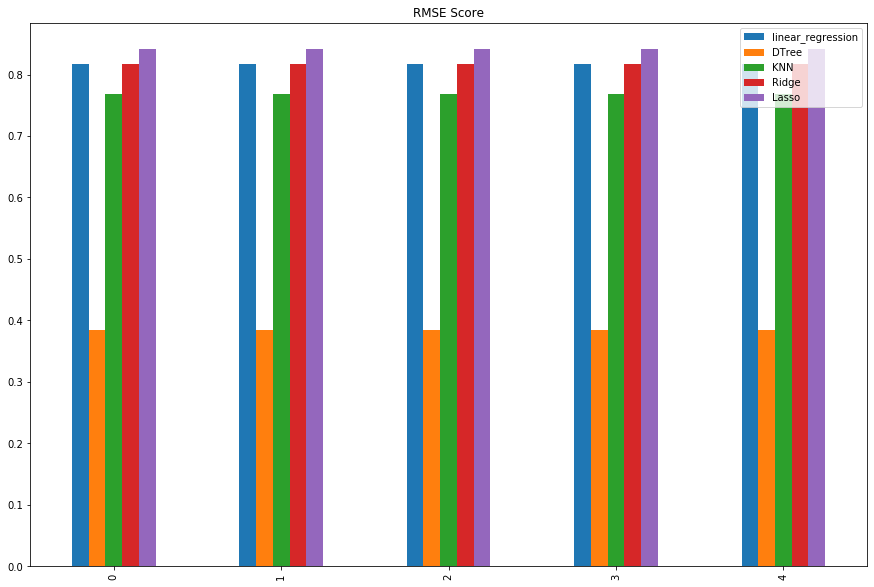

In [216]:
y=["linear_regression", "DTree",'KNN','Ridge','Lasso']

linreg_dtree.plot(y=y, kind="bar", figsize=(15,10))
plt.title("RMSE Score")


### Root mean square error is more in Linear Regression, KNN, Lasso and Ridge as compared with the Decision Tree, hence Decision Tree Regressor is a better model for the given dataset

# GridSearchCV

In [217]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
model = {'linear_regression':LinearRegression(), 'DTree': DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20), 'KNN':KNeighborsRegressor(n_neighbors=2), 'Ridge':Ridge(alpha=1.0),'Lasso':Lasso(alpha=0.1)}
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
print(grid)
# summarize the results of the grid search


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator={'DTree': DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=20,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                        'KNN': KNe

In [218]:
dir(GridSearchCV)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'classes_',
 'decision_function',
 'fit',
 'get_params',
 'inverse_transform',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'transform']

# Ensemble Model


### Random Forest

In [219]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [220]:
rf_params = {'random_state': 24, 'n_estimators': 25, 'max_depth': 20, 'n_jobs': -1, "min_samples_split": 2}
rf_scores = cross_validation_score(RandomForestRegressor(**rf_params))


1 of kfold 5
RMSE score: 0.34905441656737185

2 of kfold 5
RMSE score: 0.34905441656737185

3 of kfold 5
RMSE score: 0.34905441656737185

4 of kfold 5
RMSE score: 0.34905441656737185

5 of kfold 5
RMSE score: 0.34905441656737185


### Gradient Boosting Regressor

In [221]:
params = {'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
gb_scores = cross_validation_score(GradientBoostingRegressor(**params))


1 of kfold 5
RMSE score: 0.80417969109213

2 of kfold 5
RMSE score: 0.8043280486295945

3 of kfold 5
RMSE score: 0.8043617658458819

4 of kfold 5
RMSE score: 0.8044004508875027

5 of kfold 5
RMSE score: 0.8043154580715518


### AdaBoost Regressor

In [222]:
ada_scores = cross_validation_score(AdaBoostRegressor(n_estimators=50, random_state=0))


1 of kfold 5
RMSE score: 0.5762854842980125

2 of kfold 5
RMSE score: 0.5762854842980125

3 of kfold 5
RMSE score: 0.5762854842980125

4 of kfold 5
RMSE score: 0.5762854842980125

5 of kfold 5
RMSE score: 0.5762854842980125


### XGBRegressor

In [223]:
xgb_scores= cross_validation_score(XGBRegressor(max_depth=15,learning_rate=0.1,n_estimators=50, min_child_weight=5,
                                                random_state=42,objective='reg:squarederror',reg_lambda=5))


1 of kfold 5
RMSE score: 0.3333969264663071

2 of kfold 5
RMSE score: 0.3333969264663071

3 of kfold 5
RMSE score: 0.3333969264663071

4 of kfold 5
RMSE score: 0.3333969264663071

5 of kfold 5
RMSE score: 0.3333969264663071


In [224]:
rf_gb = pd.DataFrame({'Random Forest':rf_scores, 'Gradient Boosting Regressor': gb_scores,'AdaBoost Regressor':ada_scores,'XGBRegressor':xgb_scores})
rf_gb.head()

,Random Forest,Gradient Boosting Regressor,AdaBoost Regressor,XGBRegressor
0,0.349054,0.804180,0.576285,0.333397
1,0.349054,0.804328,0.576285,0.333397
2,0.349054,0.804362,0.576285,0.333397
3,0.349054,0.804400,0.576285,0.333397
4,0.349054,0.804315,0.576285,0.333397


Text(0.5, 1.0, 'RMSE Score')

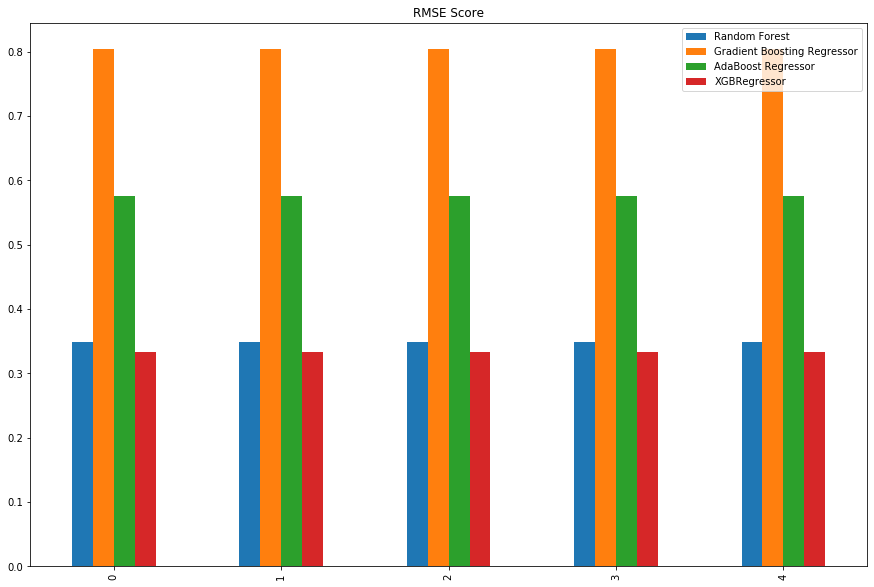

In [225]:
y1=["Random Forest", "Gradient Boosting Regressor","AdaBoost Regressor","XGBRegressor"]

rf_gb.plot(y=y1, kind="bar", figsize=(15,10))
plt.title("RMSE Score")

### Root mean square error is more in Gradient Boosting Regressor,Random forest and AdaBoost Regressor as compared with XGBoost ensemble algorithm, hence XGBoost Regressor is a better model for the given dataset